## E-commerce Business
**Will Visitor end it paying? YES/NO**
<br>
three main types of varaibles
<br>
1.Visitor related
<br>
2.Page related
<br>
3.Date of purchase related
<br> 
**visitor related**


"Administrative" : How many administrative pages visited
<br>
"Administrative Duration": How long spent in the administrative pages
<br>
"Informational" : How many informational pages visited
<br>
"Informational Duration" : How long stayed in Informational pages
<br>
"Product Related" : Product Related pages visitor opened
<br>
"Product Related Duration" : How long stayed in Product Related pages
<br>
"VisitorType" : returning,new,Others


**Page Related** : I assume these page related values are average over all visited pages
<br>
single page level!!!!
<br>
which page are the values for ? are they the average?

 "Bounce Rate" :percentage of visitors(within a session I assume) who enter the website from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session
 <br> 
 "Exit Rate"  :
 <br>
 The page’s exit rate indicates how often visitors exit from it after visiting any number of pages on the site
 <br>
 number of exits / number of pageviews for a particular page
 <br>
 "Page Value": 
 Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both)
 
 Page Value for a single page=(Ecommerce Revenue + Total Goal Value) / Unique Pageviews for Given Page
 
  <br>
**Time of Purchase Related**
 <br>
"Special Day"
 <br>
"Month"
<br>
"Weekend"
<br>


**Others**

OperatingSystems
<br>
"Browser"
<br>
"Region"
<br>
"TrafficType"
<br>

 


In [4]:
import numpy as np
import pandas as pd

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold

from sklearn.model_selection import GridSearchCV



In [147]:
df=pd.read_csv(r'C:\Users\lfakh\Downloads\coding_round_data.csv')

In [148]:
100*df['Revenue'].value_counts().values/df['Revenue'].value_counts().sum()


array([84.52554745, 15.47445255])

In [149]:
df["Revenue"] = df["Revenue"].astype(int)
df["Weekend"] = df["Weekend"].astype(int)


In [55]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,NaN,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,NaN,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,NaN,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,NaN,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,NaN,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [150]:
#df['InformationalRate']=df['Informational_Duration']/1+df['Informational']
#df['ProductRelatedRate']=df['ProductRelated_Duration']/1+df['ProductRelated']

df['#pages visited']=df['Administrative']+df['Informational']+df['ProductRelated']
df['#how long visited']=df['Administrative_Duration']+df['Informational_Duration']+df['ProductRelated_Duration']
#df['time per page']=df['#how long visited']/df['#pages visited']

In [151]:
df.corr()['Revenue'].sort_values()

ExitRates                 -0.207071
BounceRates               -0.150673
SpecialDay                -0.082305
OperatingSystems          -0.014668
Region                    -0.011595
TrafficType               -0.005113
Browser                    0.023984
Weekend                    0.029295
Informational_Duration     0.070345
Administrative_Duration    0.093587
Informational              0.095200
Administrative             0.138917
ProductRelated_Duration    0.152373
#how long visited          0.156068
ProductRelated             0.158538
#pages visited             0.164110
PageValues                 0.492569
Revenue                    1.000000
Name: Revenue, dtype: float64

In [111]:
df['PageValues'].corr(df['#pages visited'])

0.062212446385548265

In [404]:
#df['PageValues'].corr(df['time per page'])

In [152]:
df=pd.get_dummies(df, columns=['VisitorType','Month'])

In [115]:
#df["PageValues"]= pd.cut(df["PageValues"],bins=[-2, 1,5, 10 , 15, 20, 30, 50,100,np.inf], labels=['a', 'b', 'c', 'd','e','f','g','h','i'])
#vals={'a':1,'b':2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8,'i':9}
#df["PageValues"]=df["PageValues"].map(vals)                                                             
#df['PageValues']=df['PageValues'].astype('int')

In [153]:
X=df.drop('Revenue',axis=1)
y=df['Revenue']

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [155]:
y_train.value_counts()/y_train.value_counts().sum() #change this. this is not the same distribution

0    0.848236
1    0.151764
Name: Revenue, dtype: float64

## Base Line Model

In [409]:

logreg=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
M_LG=logreg.fit(X_train,y_train)

In [410]:
y_pred_train=M_LG.predict(X_train)
y_pred_test=M_LG.predict(X_test)

auc_train=metrics.roc_auc_score(y_train, y_pred_train)
auc_test=metrics.roc_auc_score(y_test, y_pred_test)



print('AUC Training ',auc_train)
print('AUC Testing',auc_test)

AUC Training  0.6770823827648125
AUC Testing 0.6639902676399028


## Train XGboost with default hyperprameters

In [125]:
model=XGBClassifier(booster='gbtree',objective='binary:logistic',eta=0.3,gamma=0,max_depth=6,min_child_weight=0,scale_pos_weight=0,n_jobs=4,n_estimators=100,random_state=7)

M=model.fit(X_train, y_train,verbose=True,eval_metric="auc")

In [126]:
y_pred_train=M.predict(X_train)
y_pred_test=M.predict(X_test)
auc_train=metrics.roc_auc_score(y_train, y_pred_train)
auc_test=metrics.roc_auc_score(y_test, y_pred_test)



print('AUC Training ',auc_train)
print('AUC Testing',auc_test)

AUC Training  0.5
AUC Testing 0.5


In [127]:
model=XGBClassifier(booster='gbtree',objective='binary:logistic',eta=0.3,gamma=0,max_depth=6,min_child_weight=0,scale_pos_weight=6,n_jobs=4,n_estimators=100,random_state=7)
M=model.fit(X_train, y_train,verbose=True,eval_metric="auc")

y_pred_train=M.predict(X_train)
y_pred_test=M.predict(X_test)
auc_train=metrics.roc_auc_score(y_train, y_pred_train)
auc_test=metrics.roc_auc_score(y_test, y_pred_test)



print('AUC Training ',auc_train)
print('AUC Testing',auc_test)

AUC Training  0.991095972272021
AUC Testing 0.7985401459854015


In [156]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'scale_pos_weight': [6],
    'eta':[ 0.01,0.05, 0.1,0.15 ],
    'min_child_weight':[6],
    'max_depth':[4],
    'gamma':[2,4,6,8,12],
    'n_estimators': [20,50,100]
    
    

}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train, y_train)


model=XGBClassifier(**grid_search.best_params_)
M=model.fit(X_train, y_train,verbose=True,eval_metric="auc")
y_pred_train=M.predict(X_train)
y_pred_test=M.predict(X_test)

auc_train=metrics.roc_auc_score(y_train, y_pred_train)
auc_test=metrics.roc_auc_score(y_test, y_pred_test)



print('AUC Training ',auc_train)
print('AUC Testing',auc_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[19:30:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC Training  0.8735412740145044
AUC Testing 0.8613138686131387


In [157]:
grid_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, gamma=4, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=4, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1, ...)

## Grid Search

In [158]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'scale_pos_weight': [6],
    'eta':[ 0.09, 0.1,0.11 ],
    'min_child_weight':[6],
    'max_depth':[4],
    'gamma':[3,4,5],
    'n_estimators': [40,50,60]
    
    

}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train, y_train)


model=XGBClassifier(**grid_search.best_params_)
M=model.fit(X_train, y_train,verbose=True,eval_metric="auc")
y_pred_train=M.predict(X_train)
y_pred_test=M.predict(X_test)

auc_train=metrics.roc_auc_score(y_train, y_pred_train)
auc_test=metrics.roc_auc_score(y_test, y_pred_test)



print('AUC Training ',auc_train)
print('AUC Testing',auc_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[19:35:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC Training  0.875583723919693
AUC Testing 0.8605839416058394


In [159]:
grid_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.11, gamma=4, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.109999999,
              max_delta_step=0, max_depth=4, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1, ...)

In [160]:
model=XGBClassifier(booster='gbtree',objective='binary:logistic',eta=0.11,gamma=4,max_depth=4,min_child_weight=6,scale_pos_weight=6,n_jobs=4,n_estimators=50,random_state=7)
M=model.fit(X_train, y_train,verbose=True,eval_metric="auc")

y_pred_train=M.predict(X_train)
y_pred_test=M.predict(X_test)

auc_train=metrics.roc_auc_score(y_train, y_pred_train)
auc_test=metrics.roc_auc_score(y_test, y_pred_test)



print('AUC Training ',auc_train)
print('AUC Testing',auc_test)

AUC Training  0.875583723919693
AUC Testing 0.8605839416058394


In [528]:
fpr_train,tpr_train,threshols_train=metrics.roc_curve(y_train,y_pred_train)
fpr_test,tpr_test,threshols_test=metrics.roc_curve(y_test,y_pred_test)

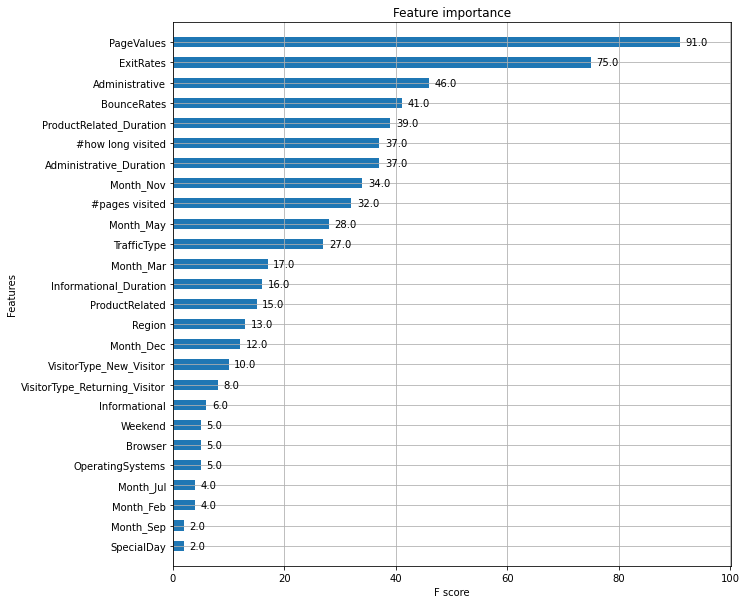

In [162]:
from matplotlib import pyplot
from xgboost import plot_importance
fig,ax=plt.subplots(figsize=(10,10))
plot_importance(model,height=0.5,ax=ax,importance_type='weight')
pyplot.show()

In [163]:
M.get_booster().dump_model('AllBoosters')

<AxesSubplot:>

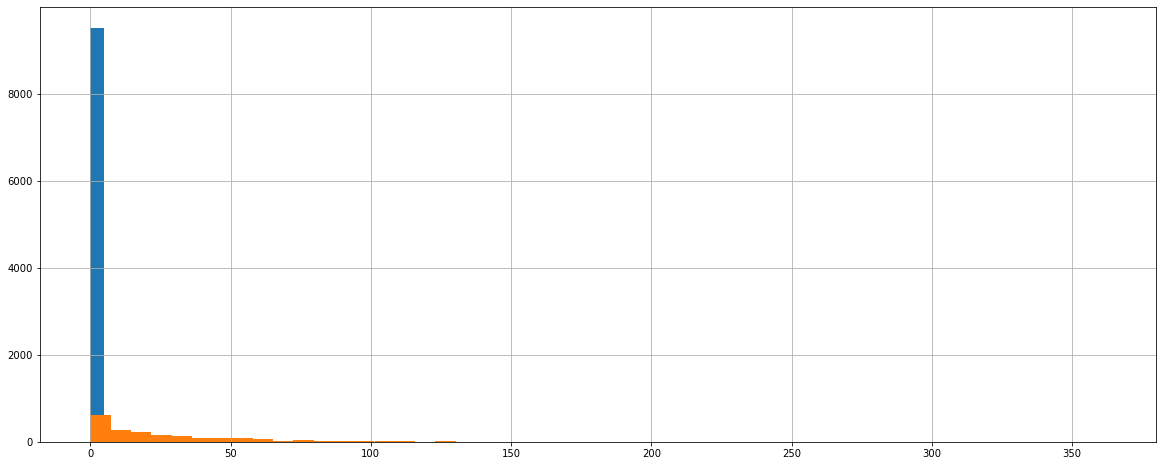

In [164]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20, 8))
df[df['Revenue']<=0]['PageValues'].hist(bins=50)

df[df['Revenue']>0]['PageValues'].hist(bins=50)


<AxesSubplot:>

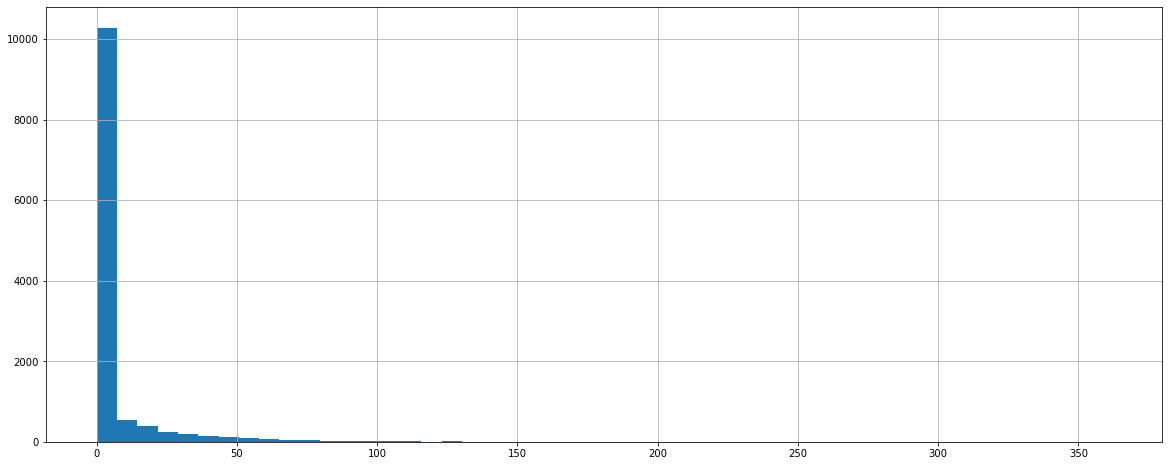

In [165]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20, 8))
df['PageValues'].hist(bins=50)
